In [2]:
%run -i /content/bin/build_export_tasks.py -f /content/Northstar_parameters.yaml -v False

Submitting query for Northstar.

Searching for Images within bounds

	[-120.29205322265625, 39.16414104768742]
	[-120.06958007812499, 39.16414104768742]
	[-120.06958007812499, 39.347095453461236]
	[-120.29205322265625, 39.347095453461236]
	[-120.29205322265625, 39.16414104768742]


For target date 2016-07-01

Found 18 SENTINEL image(s) between 2016-06-01 and 2016-08-01.
Found 12 SENTINEL image(s) with below 20 percent cloud cover.

Image 1: 2016-06-11
Image 2: 2016-06-11
Image 3: 2016-06-24
Image 4: 2016-06-24
Image 5: 2016-06-24
Image 6: 2016-06-24
Image 7: 2016-07-01
Image 8: 2016-07-01
Image 9: 2016-07-14
Image 10: 2016-07-14
Image 11: 2016-07-21
Image 12: 2016-07-21


Collected 12 SENTINEL image(s) data.

Found 78 LANDSAT images from 01-01-2014 to 12-31-2016.
|  Month number	|  Image count 	|
|	 1 	|	 5 	|
|	 2 	|	 7 	|
|	 3 	|	 5 	|
|	 4 	|	 6 	|
|	 5 	|	 6 	|
|	 6 	|	 8 	|
|	 7 	|	 9 	|
|	 8 	|	 11 	|
|	 9 	|	 8 	|
|	 10 	|	 9 	|
|	 11 	|	 3 	|
|	 12 	|	 1 	|

Collected LANDSAT d

In [1]:
import yaml
import gdal
import os
from glob import glob
import numpy as np
import sys
import time
import geopandas as gpd
from rasterstats import zonal_stats
import matplotlib.pyplot as plt

sys.path.insert(1, '/contents')
import src.imagetools as imt
import src.predict as predict
import src.preprocess_data as pre
import src.utils as utils
from src.constants import SENTINEL_WINDOW, SENTINEL_STRIDE, ANCI_WINDOW, ANCI_STRIDE
import src.constants as constant

%matplotlib inline
%load_ext autoreload
%autoreload 2
sites = ['Northstar']
site = sites[0]
parameter_file = f'/content/{site}_parameters.yaml'
#move this function to it's own source code.
_,site,localpath,reflcp,bbox_name,shp,_,_,_,outbucket,bucketsubfolder = utils.parameter_loader(parameter_file)
# package this as write predictors

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:469: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:470: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:471: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:472: FutureWarn

In [12]:
#package as sample creation
#now acquire the modified data and start generating samples

print('Model summary:\n')
model = predict.load_and_summarize('/content/model/chimera_04012019_0')

treatments = ['pre_treatment', 'post_treatment']

for treatment in treatments:

    sentinel, topo, climate, landsat = pre.gather_and_repackage_data(localpath, treatments=[treatment],\
                                                                     match_resolutions=True)
    ####Vectorized Sample Construction: High memory requirement####
    samples, outshape = predict.build_prediction_sample(sentinel, topo, climate, landsat)
    chimera_out = model.predict(samples)
    predict.writeout_predictions(chimera_out, outshape, localpath,\
                             treatment, reflcp, clipshapefile=shp)

Model summary:

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
naip_input (InputLayer)          (None, 12, 12, 3)     0                                            
____________________________________________________________________________________________________
conv2d_1 (Conv2D)                (None, 12, 12, 16)    48          naip_input[0][0]                 
____________________________________________________________________________________________________
batch_normalization_1 (BatchNorm (None, 12, 12, 16)    64          conv2d_1[0][0]                   
____________________________________________________________________________________________________
activation_1 (Activation)        (None, 12, 12, 16)    0           batch_normalization_1[0][0]      
___________________________________________________________________________

created /contents/data/reanalysis/TwinSprings/pre_treatment_sentinel_histogram_matched.tif
created /contents/data/reanalysis/TwinSprings/pre_treatment_topography.tif
created /contents/data/reanalysis/TwinSprings/pre_treatment_climate.tif
created /contents/data/reanalysis/TwinSprings/pre_treatment_landsat.tif
Zero padding predictor variables.


/contents/src/derivelcp.py:63: RuntimeWarning: divide by zero encountered in log
  cbdim = np.exp(np.add(fit[1]*np.log(baim),fit[2]*np.log(tphaim))+fit[0])


created /contents/data/reanalysis/TwinSprings/pre_treatment_biomass.tif
Writing /contents/data/reanalysis/TwinSprings/pre_treatment_biomass_wgs84_clipped.tif.


/usr/local/lib/python3.6/dist-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))
/usr/local/lib/python3.6/dist-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


Writing /contents/data/reanalysis/TwinSprings/pre_treatment_biomass_aea_clipped.asc.
created /contents/data/reanalysis/TwinSprings/pre_treatment_qmd.tif
Writing /contents/data/reanalysis/TwinSprings/pre_treatment_qmd_wgs84_clipped.tif.


/usr/local/lib/python3.6/dist-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))
/usr/local/lib/python3.6/dist-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


Writing /contents/data/reanalysis/TwinSprings/pre_treatment_qmd_aea_clipped.asc.
created /contents/data/reanalysis/TwinSprings/pre_treatment_basalarea.tif
Writing /contents/data/reanalysis/TwinSprings/pre_treatment_basalarea_wgs84_clipped.tif.


/usr/local/lib/python3.6/dist-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))
/usr/local/lib/python3.6/dist-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


Writing /contents/data/reanalysis/TwinSprings/pre_treatment_basalarea_aea_clipped.asc.
created /contents/data/reanalysis/TwinSprings/pre_treatment_canopycover.tif
Writing /contents/data/reanalysis/TwinSprings/pre_treatment_canopycover_wgs84_clipped.tif.


/usr/local/lib/python3.6/dist-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))
/usr/local/lib/python3.6/dist-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


Writing /contents/data/reanalysis/TwinSprings/pre_treatment_canopycover_aea_clipped.asc.
created /contents/data/reanalysis/TwinSprings/pre_treatment_standheight.tif
Writing /contents/data/reanalysis/TwinSprings/pre_treatment_standheight_wgs84_clipped.tif.


/usr/local/lib/python3.6/dist-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))
/usr/local/lib/python3.6/dist-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


Writing /contents/data/reanalysis/TwinSprings/pre_treatment_standheight_aea_clipped.asc.
created /contents/data/reanalysis/TwinSprings/pre_treatment_cbh.tif
Writing /contents/data/reanalysis/TwinSprings/pre_treatment_cbh_wgs84_clipped.tif.


/usr/local/lib/python3.6/dist-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))
/usr/local/lib/python3.6/dist-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


Writing /contents/data/reanalysis/TwinSprings/pre_treatment_cbh_aea_clipped.asc.
created /contents/data/reanalysis/TwinSprings/pre_treatment_tpha.tif
Writing /contents/data/reanalysis/TwinSprings/pre_treatment_tpha_wgs84_clipped.tif.


/usr/local/lib/python3.6/dist-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))
/usr/local/lib/python3.6/dist-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


Writing /contents/data/reanalysis/TwinSprings/pre_treatment_tpha_aea_clipped.asc.
created /contents/data/reanalysis/TwinSprings/pre_treatment_cbd.tif
Writing /contents/data/reanalysis/TwinSprings/pre_treatment_cbd_wgs84_clipped.tif.


/usr/local/lib/python3.6/dist-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))
/usr/local/lib/python3.6/dist-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


Writing /contents/data/reanalysis/TwinSprings/pre_treatment_cbd_aea_clipped.asc.
created /contents/data/reanalysis/TwinSprings/pre_treatment_none.tif
created /contents/data/reanalysis/TwinSprings/pre_treatment_conifer.tif
created /contents/data/reanalysis/TwinSprings/pre_treatment_decidous.tif
created /contents/data/reanalysis/TwinSprings/pre_treatment_mixed.tif
created /contents/data/reanalysis/TwinSprings/pre_treatment_dead.tif
created /contents/data/reanalysis/TwinSprings/post_treatment_sentinel_histogram_matched.tif
created /contents/data/reanalysis/TwinSprings/post_treatment_topography.tif
created /contents/data/reanalysis/TwinSprings/post_treatment_climate.tif
created /contents/data/reanalysis/TwinSprings/post_treatment_landsat.tif
Zero padding predictor variables.


/contents/src/derivelcp.py:63: RuntimeWarning: divide by zero encountered in log
  cbdim = np.exp(np.add(fit[1]*np.log(baim),fit[2]*np.log(tphaim))+fit[0])


created /contents/data/reanalysis/TwinSprings/post_treatment_biomass.tif
Writing /contents/data/reanalysis/TwinSprings/post_treatment_biomass_wgs84_clipped.tif.


/usr/local/lib/python3.6/dist-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))
/usr/local/lib/python3.6/dist-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


Writing /contents/data/reanalysis/TwinSprings/post_treatment_biomass_aea_clipped.asc.
created /contents/data/reanalysis/TwinSprings/post_treatment_qmd.tif
Writing /contents/data/reanalysis/TwinSprings/post_treatment_qmd_wgs84_clipped.tif.


/usr/local/lib/python3.6/dist-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))
/usr/local/lib/python3.6/dist-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


Writing /contents/data/reanalysis/TwinSprings/post_treatment_qmd_aea_clipped.asc.
created /contents/data/reanalysis/TwinSprings/post_treatment_basalarea.tif
Writing /contents/data/reanalysis/TwinSprings/post_treatment_basalarea_wgs84_clipped.tif.


/usr/local/lib/python3.6/dist-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))
/usr/local/lib/python3.6/dist-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


Writing /contents/data/reanalysis/TwinSprings/post_treatment_basalarea_aea_clipped.asc.
created /contents/data/reanalysis/TwinSprings/post_treatment_canopycover.tif
Writing /contents/data/reanalysis/TwinSprings/post_treatment_canopycover_wgs84_clipped.tif.


/usr/local/lib/python3.6/dist-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))
/usr/local/lib/python3.6/dist-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


Writing /contents/data/reanalysis/TwinSprings/post_treatment_canopycover_aea_clipped.asc.
created /contents/data/reanalysis/TwinSprings/post_treatment_standheight.tif
Writing /contents/data/reanalysis/TwinSprings/post_treatment_standheight_wgs84_clipped.tif.


/usr/local/lib/python3.6/dist-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))
/usr/local/lib/python3.6/dist-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


Writing /contents/data/reanalysis/TwinSprings/post_treatment_standheight_aea_clipped.asc.
created /contents/data/reanalysis/TwinSprings/post_treatment_cbh.tif
Writing /contents/data/reanalysis/TwinSprings/post_treatment_cbh_wgs84_clipped.tif.


/usr/local/lib/python3.6/dist-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))
/usr/local/lib/python3.6/dist-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


Writing /contents/data/reanalysis/TwinSprings/post_treatment_cbh_aea_clipped.asc.
created /contents/data/reanalysis/TwinSprings/post_treatment_tpha.tif
Writing /contents/data/reanalysis/TwinSprings/post_treatment_tpha_wgs84_clipped.tif.


/usr/local/lib/python3.6/dist-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))
/usr/local/lib/python3.6/dist-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


Writing /contents/data/reanalysis/TwinSprings/post_treatment_tpha_aea_clipped.asc.
created /contents/data/reanalysis/TwinSprings/post_treatment_cbd.tif
Writing /contents/data/reanalysis/TwinSprings/post_treatment_cbd_wgs84_clipped.tif.


/usr/local/lib/python3.6/dist-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))
/usr/local/lib/python3.6/dist-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


Writing /contents/data/reanalysis/TwinSprings/post_treatment_cbd_aea_clipped.asc.
created /contents/data/reanalysis/TwinSprings/post_treatment_none.tif
created /contents/data/reanalysis/TwinSprings/post_treatment_conifer.tif
created /contents/data/reanalysis/TwinSprings/post_treatment_decidous.tif
created /contents/data/reanalysis/TwinSprings/post_treatment_mixed.tif
created /contents/data/reanalysis/TwinSprings/post_treatment_dead.tif


In [ ]:
#export sample 
#export_samplefile = f'{localpath}/{treatment}_X_predictors.pklz'
#utils.write_pickle(export_samplefile,samples)

In [160]:
!gsutil -m cp {localpath}/* gs://{outbucket}/{bucketsubfolder}

Omitting directory "file:///contents/data/reanalysis/TwinSprings/local". (Did you mean to do cp -r?)
Copying file:///contents/data/reanalysis/TwinSprings/TwinSprings_clipped.lcp [Content-Type=application/octet-stream]...
Copying file:///contents/data/reanalysis/TwinSprings/post_treatment_basalarea.tif [Content-Type=image/tiff]...
Copying file:///contents/data/reanalysis/TwinSprings/TwinSprings_lcp_wgs84.tif [Content-Type=image/tiff]...
Copying file:///contents/data/reanalysis/TwinSprings/post_treatment_ancillary.tif [Content-Type=image/tiff]...
Copying file:///contents/data/reanalysis/TwinSprings/post_treatment_basalarea_aea_clipped.asc [Content-Type=text/plain]...
Copying file:///contents/data/reanalysis/TwinSprings/post_treatment_basalarea_aea.asc [Content-Type=text/plain]...
Copying file:///contents/data/reanalysis/TwinSprings/post_treatment_basalarea_aea_clipped.asc.aux.xml [Content-Type=application/xml]...
Copying file:///contents/data/reanalysis/TwinSprings/post_treatment_basalar

/usr/local/lib/python3.6/dist-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


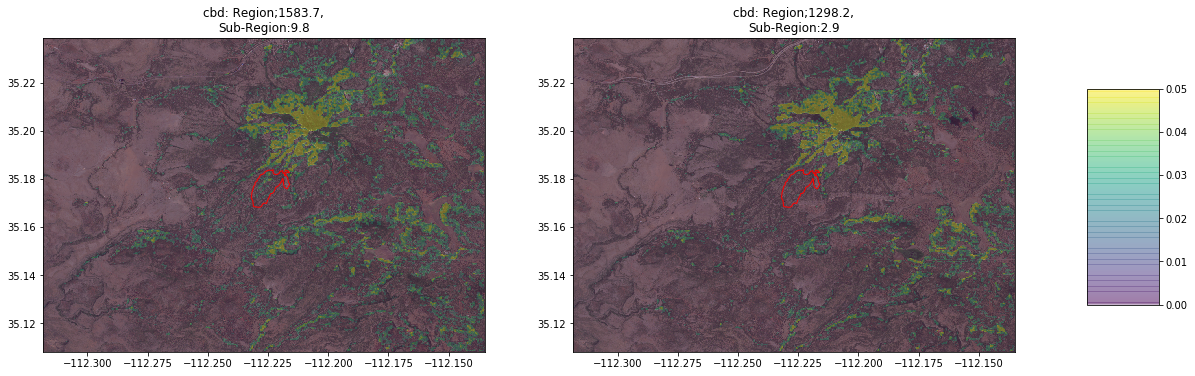

In [16]:
#add area of assessment shapefile overlay
ds = gpd.read_file(shp)
i = 3 
ds.crs = {'init':'epsg:32612'} #UTM zone 12N
ds = ds.to_crs({'init':'epsg:4326'})
treatments = ['pre_treatment', 'post_treatment']
f, ax = plt.subplots(1,2,figsize=(20,10))
var = constant.CHIMERA_FUELS_BANDS[i]
for a,treatment in enumerate(treatments):
    sentinel_file = sorted(glob(f'{localpath}/{treatment}*sentinel*matched*.tif'))[0]
    structure_file = f'{localpath}/{treatment}_{var}.tif'

    sentinel = gdal.Open(sentinel_file).ReadAsArray()
    forest_structure = gdal.Open(structure_file).ReadAsArray()
    
    with rasterio.open(structure_file) as src:
        affine = src.transform
        arr = src.read(1)
        df_zonal_stats = gpd.GeoDataFrame(zonal_stats(ds,arr,affine=affine, nodata=-9999, \
                                                     stats='min mean max median sum'))   
        
    _, extent = utils.make_extent(structure_file)
    ax[a].set_title(f'{var}: Region;%0.1f,\nSub-Region:%0.1f'%(np.sum(forest_structure),\
                                                                                    df_zonal_stats['sum']))
    ax[a].imshow(np.moveaxis(sentinel,0,-1), extent=extent)
    im = ax[a].imshow(forest_structure, extent=extent, alpha=0.3, \
                   vmin=0,vmax=0.05)
    ds.plot(ax=ax[a],facecolor='none',edgecolor='red')
f.subplots_adjust(right=0.8)
cbar_ax = f.add_axes([0.85, 0.35, 0.05, 0.3])
f.colorbar(im, cax=cbar_ax)
f.savefig(f'/contents/figs/{site}_{var}_demo.png', dpi=400,\
         bbox_inches='tight')

In [ ]:
def build_prediction_sample(sentinel, topo, climate, landsat,\
                           ancillary_rows, ancillary_cols, sentinel_rows, sentinel_cols,\
                           r, c):
    sentinel_i = np.moveaxis(sentinel[:,\
                                      sentinel_rows[r,c,...],\
                                      sentinel_cols[r,c,...]],0,-1)
    topo_i = np.expand_dims(np.mean(topo[:,\
                          ancillary_rows[r,c,...],\
                          ancillary_cols[r,c,...]],\
                     axis=(1,2)), axis=0)
    climate_i = np.expand_dims(np.mean(climate[:,\
                                           ancillary_rows[r,c,...],\
                                           ancillary_cols[r,c,...]],\
                                   axis=(1,2)), axis=0)
    landsat_i = np.moveaxis(np.reshape(landsat[:,\
                                   ancillary_rows[r,c,...],\
                                   ancillary_cols[r,c,...]], \
                           (12,7,4,4)),1,-1)
    sentinel_i = np.expand_dims(sentinel_i, axis=0)
    topo_i = np.expand_dims(topo_i, axis=0)
    climate_i = np.expand_dims(climate_i, axis=0)
    landsat_i = np.expand_dims(landsat_i, axis=0)
    return [sentinel_i, topo_i, climate_i, landsat_i]

####METHOD 1: Naive Nested Loop#####
import time
start = time.time()
rr = np.shape(sentinel_rows)[0]
cc = np.shape(sentinel_rows)[1]
forest_structure = np.zeros((4,rr,cc))
forest_class = np.zeros((rr,cc))

#this method is slower, but would work better in batched parallel since the full dataset
#does not have to loaded in one-fell-swoop
#keep it for now, but develop a more efficient method for full memory load
for r in range(rr):
    for c in range(cc):
        sample = build_prediction_sample(sentinel, topo, climate, landsat,\
                                 ancillary_rows, ancillary_cols, \
                                 sentinel_rows, sentinel_cols, r, c)
        out = pred.chimera_predict(model, [sample])
        forest_class[r,c] = np.argmax(out[0][0])
        forest_structure[0,r,c] = out[0][1][0][0]
        forest_structure[1,r,c] = out[0][1][0][1]
        forest_structure[2,r,c] = out[0][1][0][2]
        forest_structure[3,r,c] = out[0][1][0][3]
        
end = time.time()
print(end - start)
##1149.867 secs.
#note outputs are in the order...
chimera_bands = ['','','','']